# Stage 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df_visual = df.copy()
df = df.drop(['Unnamed: 0'], axis=1)
dfpairplot = df.copy() #untuk visualisasi pairplot setelah melakukan drop feature 'Unnamed: 0'
df.head()

Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0

In [5]:
df.sample(5)

Age               Employment Type GraduateOrNot  AnnualIncome  \
137   29  Private Sector/Self Employed           Yes        600000   
994   28  Private Sector/Self Employed           Yes        550000   
368   35  Private Sector/Self Employed            No        800000   
774   28  Private Sector/Self Employed           Yes        800000   
625   31  Private Sector/Self Employed           Yes       1750000   

     FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
137              4                1           Yes                  No   
994              6                1            No                  No   
368              3                0            No                  No   
774              5                0           Yes                  No   
625              4                0            No                  No   

     TravelInsurance  
137                0  
994                0  
368                1  
774                0  
625                0

# Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


Tiap-tiap feature tidak memiliki missing values.

In [7]:
df.describe()

Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean     29.650226  9.327630e+05       4.752894         0.277806   
std       2.913308  3.768557e+05       1.609650         0.448030   
min      25.000000  3.000000e+05       2.000000         0.000000   
25%      28.000000  6.000000e+05       4.000000         0.000000   
50%      29.000000  9.000000e+05       5.000000         0.000000   
75%      32.000000  1.250000e+06       6.000000         1.000000   
max      35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

Tidak ada perbedaan nilai yang signfikan antara nilai mean dan median dari masing-masing feature. Sehingga bisa diambil kesimpulan bahwa data terdistribusi mendekati normal.

In [8]:
cats_dtypes=['object']
cats_df=df.select_dtypes(include=cats_dtypes).columns
cats_df

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [9]:
df[cats_df].describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

Untuk tiap-tiap feature kategorikal, pembagian cukup tidak merata. Lalu, kesimpulan lain yang dapat diambil adalah mayoritas dari customer tidak sering bepergian dan mayoritas juga belum pernah travel abroad.

In [10]:
df.duplicated(subset=['Age','Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']).sum()

885

In [11]:
from scipy import stats

In [12]:
num_df = ["Age","AnnualIncome","FamilyMembers"]

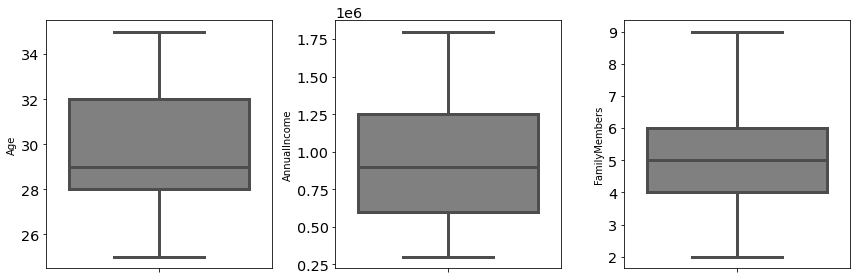

In [13]:
for i in range(0, len(num_df)):
    plt.subplot(1, len(num_df), i+1)
    sns.boxplot(y=df[num_df[i]], color='gray', orient='v')
    plt.tight_layout()

Berdasarkan boxplot di atas, feature-feature numerikal tidak memiliki outlier.

In [14]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

Persentase dari target masih tergolong balance (65% untuk yang tidak & 35% untuk yang iya)

<AxesSubplot:>

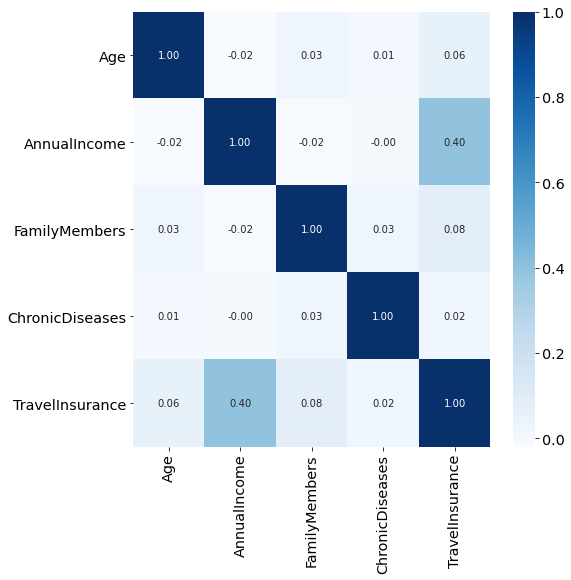

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Berdasarkan heatmap di atas, dapat dilihat bahwa nilai maksimum korelasi tidak ada yang melebihi 0.7, yang mana menjustifikasi tidak ada feature yang redundant.

Pengecekan korelasi antara feature bertipe categorical dengan datatype object ['GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad'] dengan value numerical

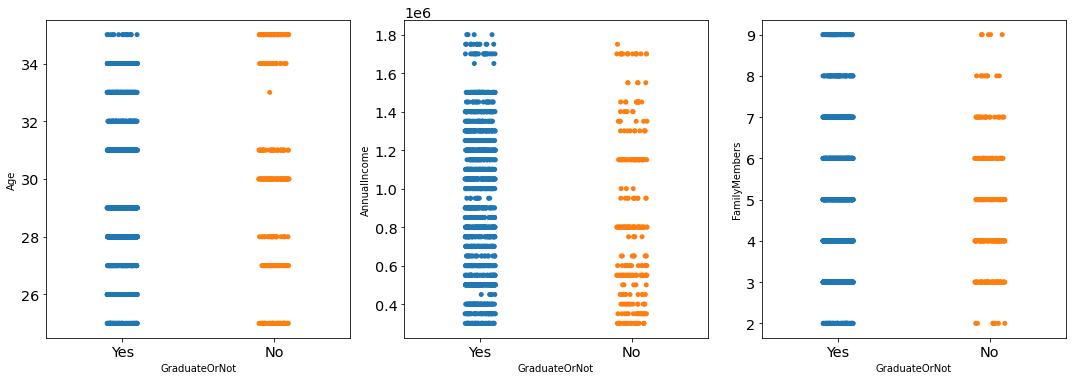

In [16]:
#GraduateOrNot
fig = plt.figure(figsize=(15,15))
for i in range(0, len(num_df)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='GraduateOrNot',y=num_df[i])
    plt.tight_layout()

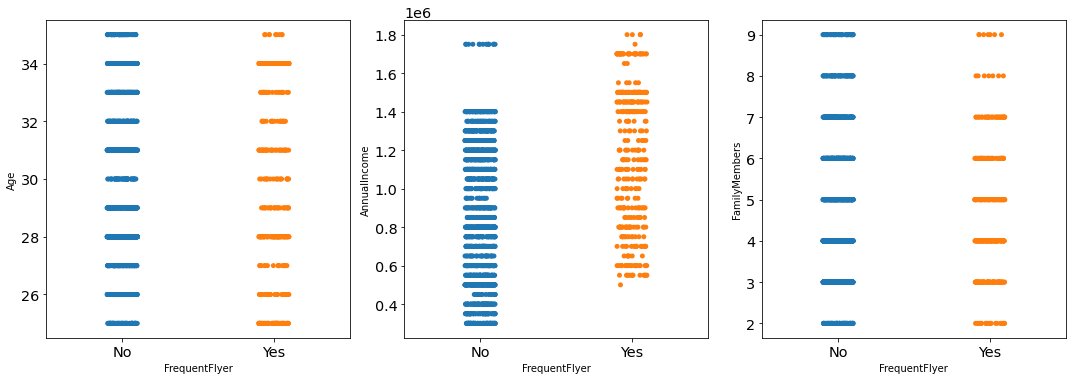

In [17]:
#FrequentFlyer
fig = plt.figure(figsize=(15,15))
for i in range(0, len(num_df)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='FrequentFlyer',y=num_df[i])
    plt.tight_layout()

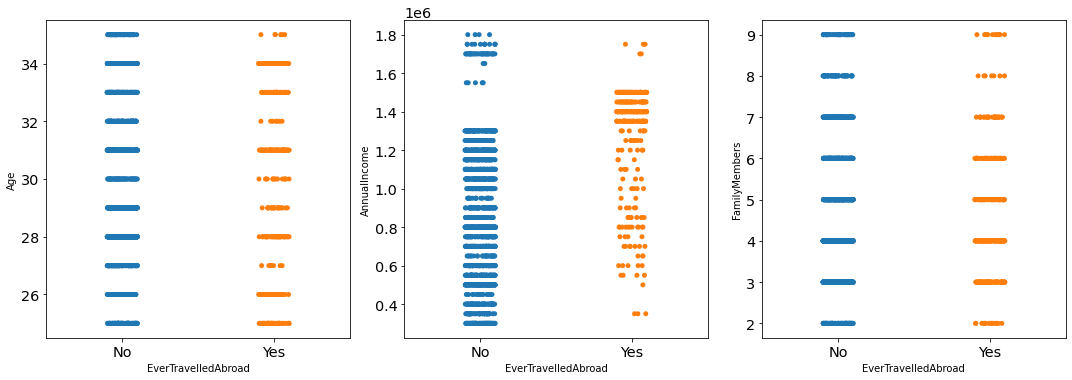

In [18]:
#EverTravelledAbroad
fig = plt.figure(figsize=(15,15))
for i in range(0, len(num_df)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='EverTravelledAbroad',y=num_df[i])
    plt.tight_layout()

Korelasi antara feature categorical bertipe data object dengan feature numerical terlihat pola yang jelas korelasi antara FrequentFlyer dengan AnnualIncome begitu pula antara EvertravelledAbroad, semakin tinggi AnnualIncome, semakin banyak customer dengan frekuensi penerbangan lebih dari 4 kali dan customer yang sebelumnya pernah bepergian ke luar negeri.

# Data Cleansing

Tidak terdapat missing values, duplicated data, outlier, imbalance data, dan data redundant pada dataframe.

# Feature Engineering

In [19]:
df['EmploymentType_label'] = df['Employment Type'].astype('category').cat.codes
df['GraduateOrNot_label'] = df['GraduateOrNot'].astype('category').cat.codes
df['FrequentFlyer_label'] = df['FrequentFlyer'].astype('category').cat.codes
df['EverTravelledAbroad_label'] = df['EverTravelledAbroad'].astype('category').cat.codes

Kami memutuskan untuk menggunakan seluruh feature dari dataframe karena berdasarkan plot korelasi tidak ada feature yang redundant.

EmploymentType
<br> 0 = Government Sector
<br> 1 = Private Sector/Self Employed

GraduateOrNot
<br> 0 = No
<br> 1 = Yes

FrequentFlyer
<br> 0 = No
<br> 1 = Yes

EverTravelledAbroad
<br> 0 = No
<br> 1 = Yes

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
df["AnnualIncome_std"] = StandardScaler().fit_transform(df["AnnualIncome"].values.reshape(len(df), 1))
df["FamilyMembers_nml"] = MinMaxScaler().fit_transform(df["FamilyMembers"].values.reshape(len(df), 1))
df["Age_std"] = StandardScaler().fit_transform(df["Age"].values.reshape(len(df), 1)) 

<b>Note</b> :
<br>Feature Age dan AnnualIncome dilakukan standarisasi karena persebaran data terdistribusi normal, sedangkan distribusi persebaran data FamilyMembers terlihat ke arah negatively skewed dengan nilai Median > Mean, maka dari itu kami melakukan normalisasi pada feature FamilyMembers

In [22]:
df_final = df.drop(['Employment Type','AnnualIncome','FamilyMembers','GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad', 'Age'], axis=1)
df_final.sample(10)

ChronicDiseases  TravelInsurance  EmploymentType_label  \
481                 0                0                     1   
1401                0                0                     0   
1224                0                1                     1   
733                 0                0                     0   
229                 0                0                     1   
1023                0                1                     1   
916                 0                1                     1   
197                 1                0                     1   
1985                0                1                     1   
141                 0                0                     1   

      GraduateOrNot_label  FrequentFlyer_label  EverTravelledAbroad_label  \
481                     1                    0                          0   
1401                    1                    0                          0   
1224                    1                    0                          1   
733                     1                    1                          0   
229                     1                    0                          0   
1023                    1                    0                          1   
916                     1                    1                          1   
197                     1                    1                          0   
1985                    1                    1                          1   
141                     1                    0                          1   

      AnnualIncome_std  FamilyMembers_nml   Age_std  
481           0.443881           0.285714 -0.223248  
1401         -1.679482           0.142857 -0.566587  
1224          1.240142           0.714286  1.150107  
733          -0.086960           0.285714 -0.909926  
229           0.178461           0.000000  1.493446  
1023          1.240142           0.142857 -1.596603  
916           1.505563           0.571429 -1.253264  
197           0.576591           0.428571 -0.223248  
1985          0.178461           0.571429  1.493446  
141           1.240142           0.142857 -1.596603

<AxesSubplot:xlabel='AnnualIncome_std', ylabel='Density'>

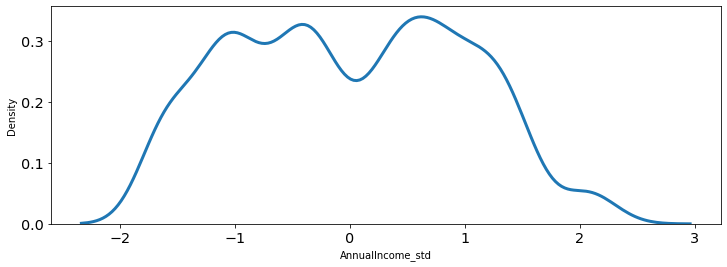

In [23]:
sns.kdeplot(x="AnnualIncome_std", data=df_final)

<AxesSubplot:xlabel='FamilyMembers_nml', ylabel='Density'>

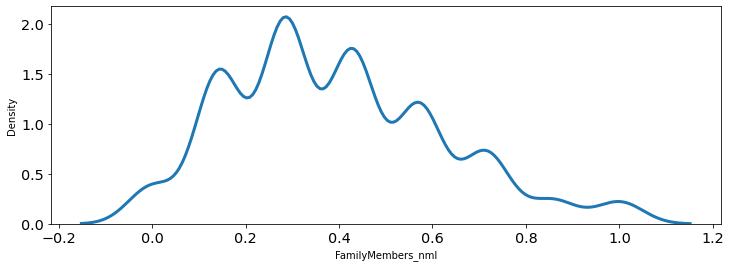

In [24]:
sns.kdeplot(x="FamilyMembers_nml", data=df_final)

<AxesSubplot:xlabel='Age_std', ylabel='Density'>

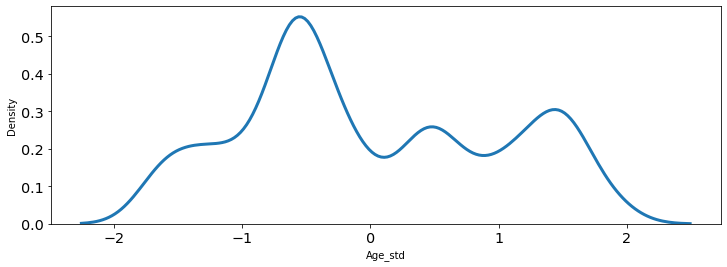

In [25]:
sns.kdeplot(x="Age_std", data=df_final)

<b>Note :</b>
<br>df_final yang akan digunakan untuk pemodelan di machine learning

# STAGE 2

## Pairplot 

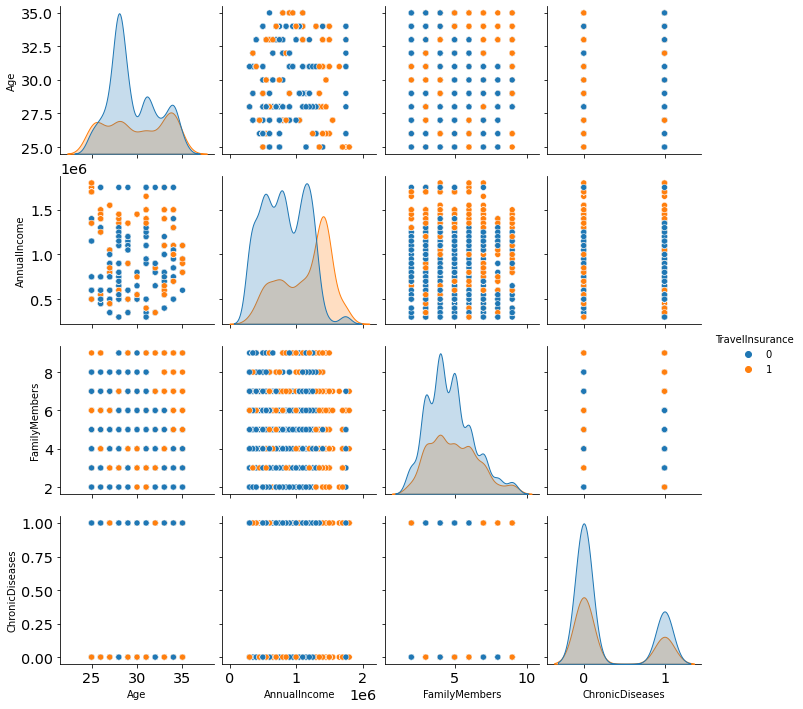

In [26]:
sns.pairplot(dfpairplot, diag_kind='kde', hue='TravelInsurance')

## Feature Visualization

### Age

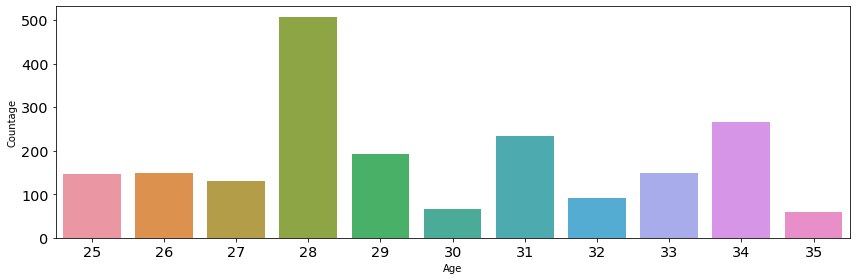

In [27]:
age = df.groupby(['Age']).agg({'TravelInsurance':['count']}).reset_index()
age.columns = ['Age','Countage']
sns.barplot(x='Age', y='Countage', data=age);
plt.tight_layout()

### Employment Type

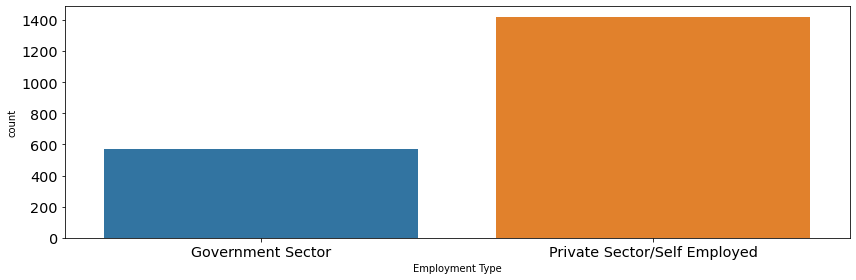

In [28]:
EmploymentType = df.groupby(['Employment Type']).agg({'TravelInsurance':['count']}).reset_index()
EmploymentType.columns = ['Employment Type','count']
sns.barplot(x='Employment Type', y='count', data=EmploymentType);
plt.tight_layout()

### Graduate or Not

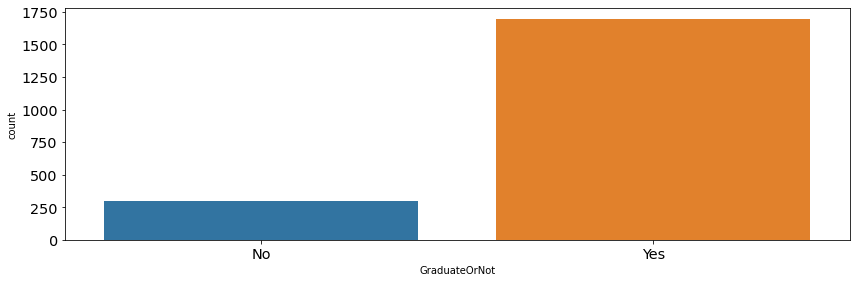

In [29]:
Graduate = df.groupby(['GraduateOrNot']).agg({'TravelInsurance':['count']}).reset_index()
Graduate.columns = ['GraduateOrNot','count']
sns.barplot(x='GraduateOrNot', y='count', data=Graduate);
plt.tight_layout()

### Annual Income

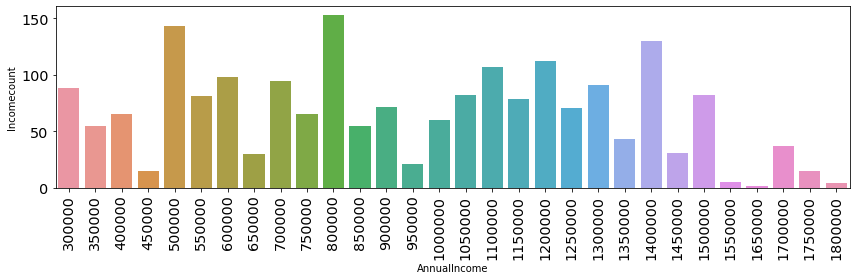

In [30]:
Annuals = df.groupby(['AnnualIncome']).agg({'TravelInsurance':['count']}).reset_index()
Annuals.columns = ['AnnualIncome', 'Incomecount']
g = sns.barplot(x='AnnualIncome', y='Incomecount', data=Annuals)
g.set_xticklabels(labels=Annuals['AnnualIncome'],rotation=90)
plt.tight_layout()

### Family Members

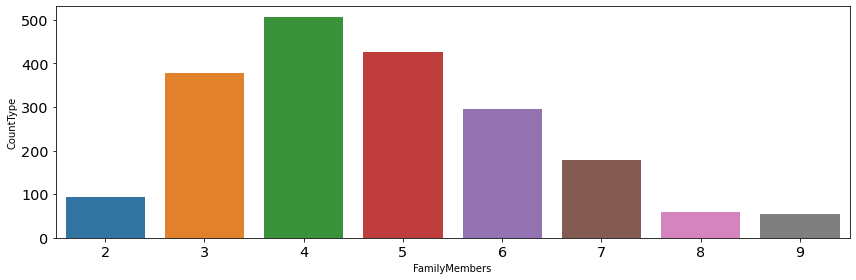

In [31]:
Family = df.groupby(['FamilyMembers']).agg({'TravelInsurance':['count']}).reset_index()
Family.columns = ['FamilyMembers','CountType']
sns.barplot(x='FamilyMembers', y='CountType', data=Family);
plt.tight_layout()

### Chronic Diseases

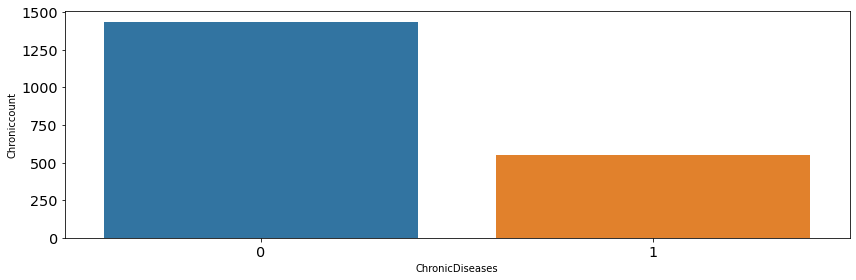

In [32]:
Chronics = df.groupby(['ChronicDiseases']).agg({'TravelInsurance':['count']}).reset_index()
Chronics.columns = ['ChronicDiseases', 'Chroniccount']
sns.barplot(x='ChronicDiseases', y='Chroniccount', data=Chronics);
plt.tight_layout()

### Frequent Flyer

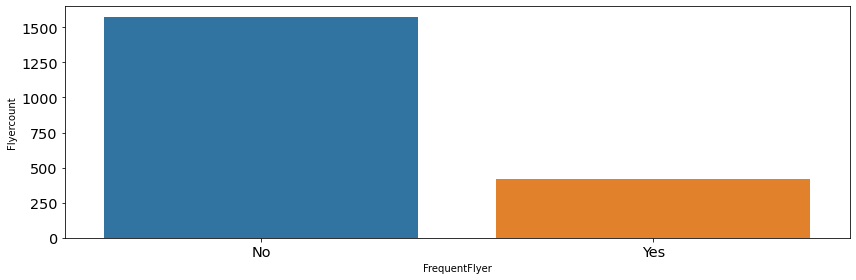

In [33]:
FrequentFlyer = df.groupby(['FrequentFlyer']).agg({'TravelInsurance':['count']}).reset_index()
FrequentFlyer.columns = ['FrequentFlyer', 'Flyercount']
sns.barplot(x='FrequentFlyer', y='Flyercount', data=FrequentFlyer);
plt.tight_layout()

### Ever Travelled Abroad

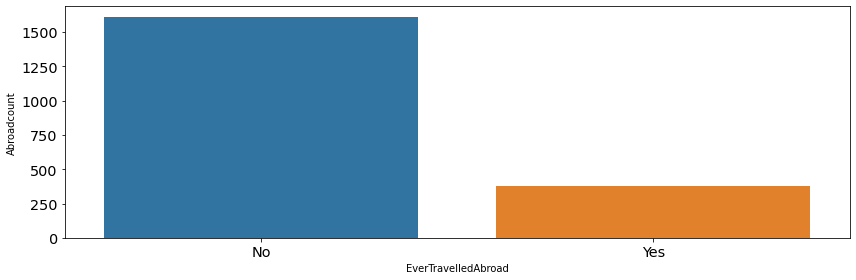

In [34]:
EverTravelledAbroad = df.groupby(['EverTravelledAbroad']).agg({'TravelInsurance':['count']}).reset_index()
EverTravelledAbroad.columns = ['EverTravelledAbroad', 'Abroadcount']
sns.barplot(x='EverTravelledAbroad', y='Abroadcount', data=EverTravelledAbroad);
plt.tight_layout()

### Travel Insurance

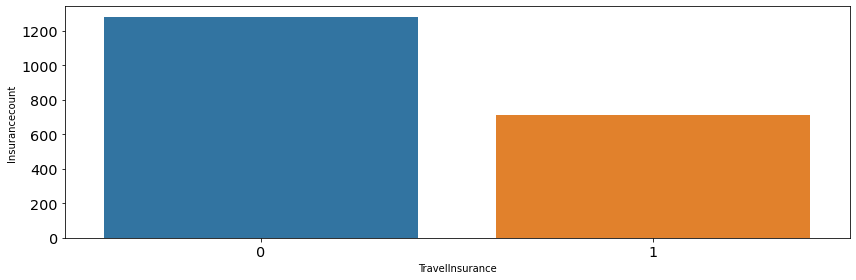

In [35]:
Insurance = df.groupby(['TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
Insurance.columns = ['TravelInsurance', 'Insurancecount']
sns.barplot(x='TravelInsurance', y='Insurancecount', data=Insurance);
plt.tight_layout()

## Feature to Label

In [36]:
import seaborn as sns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1987 non-null   int64  
 1   Employment Type            1987 non-null   object 
 2   GraduateOrNot              1987 non-null   object 
 3   AnnualIncome               1987 non-null   int64  
 4   FamilyMembers              1987 non-null   int64  
 5   ChronicDiseases            1987 non-null   int64  
 6   FrequentFlyer              1987 non-null   object 
 7   EverTravelledAbroad        1987 non-null   object 
 8   TravelInsurance            1987 non-null   int64  
 9   EmploymentType_label       1987 non-null   int8   
 10  GraduateOrNot_label        1987 non-null   int8   
 11  FrequentFlyer_label        1987 non-null   int8   
 12  EverTravelledAbroad_label  1987 non-null   int8   
 13  AnnualIncome_std           1987 non-null   float

### Age to Travel Insurance

Text(0, 0.5, 'Customer Amount')

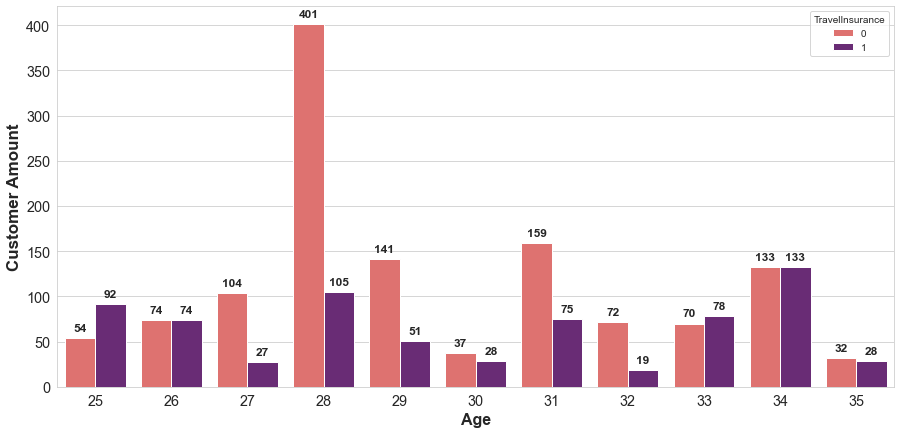

In [38]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
age = df_visual.groupby(['Age','TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
age.columns = ['Age','TravelInsurance', 'Customer Amount']
a = sns.barplot(x='Age', y='Customer Amount', hue='TravelInsurance', data=age, palette='magma_r')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size=12,
    xytext = (0, 10), 
    weight='bold',
    textcoords = 'offset points')

plt.xlabel('Age', weight='bold',fontsize=16)
plt.ylabel('Customer Amount', weight='bold', fontsize=17)

1. Customer yang membeli produk Travel Insurance dengan jumlah tertinggi berada pada umur 34 tahun.
2. Namun perbandingan antara Customer yang membeli produk Travel Insurance dengan yang tidak, pada umur 33 dan 25 tahun memiliki persentase lebih tinggi untuk membeli dengan perbandingan 53%:47% dan 63%:37%. Persentase tertinggi pada umur 25 tahun.
3. Umur 27-32 dan 35 memiliki persentase lebih tinggi pada Customer yang tidak membeli produk Travel Insurance.

### Employment Type to Travel Insurance

In [39]:
Employment = df.groupby(['Employment Type', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
Employment.columns = ['Employment Type', 'TravelInsurance', 'Employmentcount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("Private Sector/Self Employed", "Government Sector"))
fig.add_trace(go.Pie(
     values=Employment[Employment['Employment Type']=='Private Sector/Self Employed']['Employmentcount'],
     labels=Employment[Employment['Employment Type']=='Private Sector/Self Employed']['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=Employment[Employment['Employment Type']=='Government Sector']['Employmentcount'],
     labels=Employment[Employment['Employment Type']=='Government Sector']['TravelInsurance'],
     name='Yes'), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Employment Type to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

Pada kedua tipe pekerjaan, Customer dengan bidang pekerjaan Private Sector/Self Employed maupun Government Sector keduanya memiliki persentase lebih tinggi untuk Customer yang tidak membeli produk asuransi dengan persentase 59.8% dan 75.4%. Namun jumlah customer yang membeli asuransi pada private sector lebih banyak dibandingkan dengan government sector dengan persentase perbandingan 40.2%:24.6%.

### Graduate or Not to Travel Insurance

In [40]:
Graduate = df.groupby(['GraduateOrNot', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
Graduate.columns = ['GraduateOrNot', 'TravelInsurance', 'Graduatecount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("Graduate", "Not-Graduate"))
fig.add_trace(go.Pie(
     values=Graduate[Graduate['GraduateOrNot']=='Yes']['Graduatecount'],
     labels=Graduate[Graduate['GraduateOrNot']=='Yes']['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=Graduate[Graduate['GraduateOrNot']=='No']['Graduatecount'],
     labels=Graduate[Graduate['GraduateOrNot']=='No']['TravelInsurance'],
     name='Yes'), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Graduate or Not to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

Jumlah Customer Not-Graduate secara keseluruhan baik yang mengambil paket maupun tidak, memiliki jumlah Customer lebih besar ketimbang jumlah Customer pada  kategori Graduate. Namun jika ditinjau dari persentase, Customer yang membeli dan tidak membeli pada kategori Graduate maupun Non-Graduate cenderung sama dengan perbandingan persentase 33.6%:66.4%(No Graduate) dan 36.1%:63.9%(Graduate), disimpulkan bahwa Feature Graduate tidak memiliki korelasi yang kuat dengan Target/kecenderungan Customer membeli produk asuransi perjalanan atau tidak.

### Annual Income to Travel Insurance

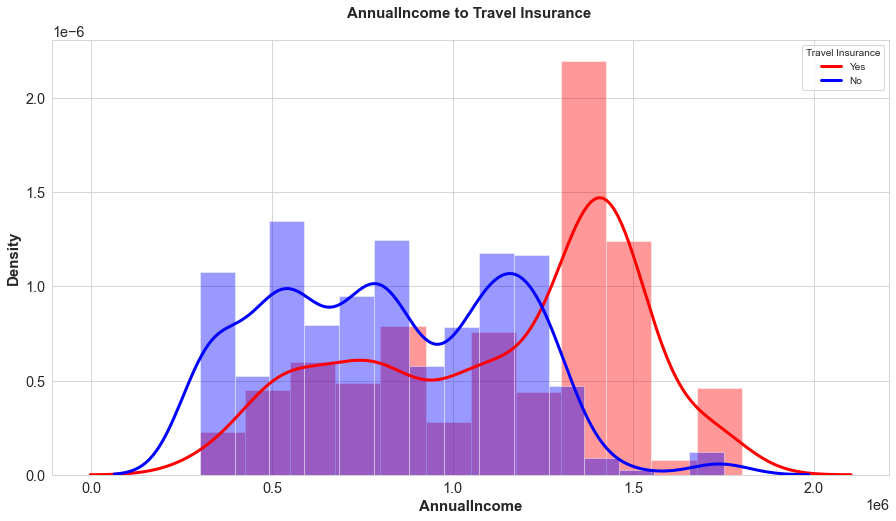

In [41]:
plt.figure(figsize = (15,8))
sns.set_style("whitegrid")
yes = df_visual[df_visual['TravelInsurance']==1]
no = df_visual[df_visual['TravelInsurance']==0]
sns.distplot(yes['AnnualIncome'],label=1,color='red')
sns.distplot(no['AnnualIncome'],label=0,color='blue')
plt.legend(labels=["Yes","No"],title = "Travel Insurance")
plt.xlabel('AnnualIncome', weight='bold',fontsize=15)
plt.ylabel('Density', weight='bold', fontsize=15)
plt.title('AnnualIncome to Travel Insurance \n', weight='bold', fontsize=15);
plt.savefig('AnInc.png');

Customer dengan penghasilan tahunan di atas 1.3 juta memiliki persentase lebih tinggi dalam membeli produk Travel Insurance dibandingkan dengan yang tidak membeli, dengan jumlah Customer terbanyak pada  penghasilan 1.4 juta. Dari insight ini kita dapat merancang dan merekomendasikan Travel Insurance Package produk dengan kisaran harga  di bawah 1.3 juta, untuk menjangkau Customer yang sebelumnya tidak membeli paket Travel Insurance.

### Family Members to Travel Insurance

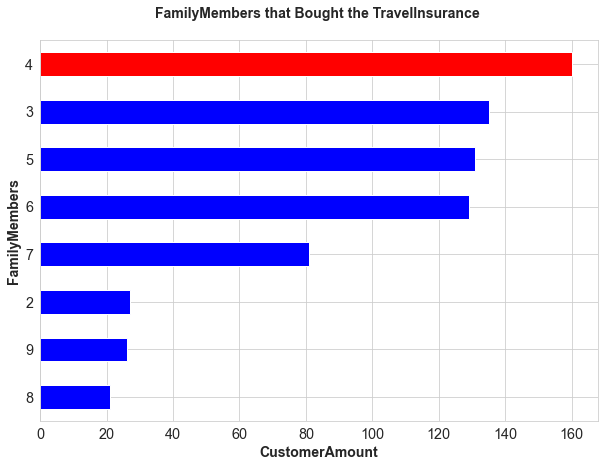

In [42]:
df_fam = df_visual.groupby(['FamilyMembers','TravelInsurance']).agg({'Unnamed: 0':pd.Series.nunique}).reset_index()
df_fam.columns = ['FamilyMembers','TravelInsurance','CustomerAmount']
df_famm = df_fam[df_fam['TravelInsurance']==1].sort_values(['CustomerAmount'], ascending=False).reset_index(drop=True)

values = np.array(df_famm['CustomerAmount'])  
idx = np.array(df_famm['FamilyMembers']) 
clrs = ['blue' if (x < max(values)) else 'red' for x in values ]

ax = df_famm.plot(x='FamilyMembers', y='CustomerAmount', kind='barh', figsize=(10, 7), color=clrs);
ax.invert_yaxis()

plt.xlabel('CustomerAmount', weight='bold',fontsize=14)
plt.ylabel('FamilyMembers', weight='bold', fontsize=14)
plt.title('FamilyMembers that Bought the TravelInsurance \n', weight='bold', fontsize=14);
plt.legend().set_visible(False)

FamilyMembers dengan anggota 4 orang, memiliki jumlah Customer yang membeli produk Travel Insurance terbanyak dengan jumlah 160 Customer.

### Chronic Diseases to Travel Insurance

In [43]:
Chronic = df.groupby(['ChronicDiseases', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
Chronic.columns = ['ChronicDiseases', 'TravelInsurance', 'Chroniccount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("Chronic Diseases", "Not-Chronic Diseases"))
fig.add_trace(go.Pie(
     values=Chronic[Chronic['ChronicDiseases']==1]['Chroniccount'],
     labels=Chronic[Chronic['ChronicDiseases']==1]['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=Chronic[Chronic['ChronicDiseases']==0]['Chroniccount'],
     labels=Chronic[Chronic['ChronicDiseases']==0]['TravelInsurance']), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Chronic Diseases to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

Persentase customer yang membeli dan tidak membeli produk asuransi cenderung sama, baik pada customer yang memiliki penyakit kronis maupun tidak dengan persentase 37.1%:62.9%(Chronic Diseases) dan 35.2%:64.8% (Not-Chronic Diseases). Sehingga chronic disease tidak memiliki pengaruh yang signifikan terhadap keinginan pelanggan untuk membeli produk asuransi.

### Frequent Flyer to Travel Insurance

In [44]:
EverTravelledAbroad = df.groupby(['EverTravelledAbroad', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
EverTravelledAbroad.columns = ['EverTravelledAbroad', 'TravelInsurance', 'Abroadcount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("EverTravelledAbroad", "Not-EverTravelledAbroad"))
fig.add_trace(go.Pie(
     values=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='Yes']['Abroadcount'],
     labels=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='Yes']['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='No']['Abroadcount'],
     labels=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='No']['TravelInsurance']), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Ever Travelled Abroad to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

In [45]:
FrequentFlyer = df.groupby(['FrequentFlyer', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
FrequentFlyer.columns = ['FrequentFlyer', 'TravelInsurance', 'Flyercount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("Frequent Flyer", "Not-Frequent Flyer"))
fig.add_trace(go.Pie(
     values=FrequentFlyer[FrequentFlyer['FrequentFlyer']=='Yes']['Flyercount'],
     labels=FrequentFlyer[FrequentFlyer['FrequentFlyer']=='Yes']['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=FrequentFlyer[FrequentFlyer['FrequentFlyer']=='No']['Flyercount'],
     labels=FrequentFlyer[FrequentFlyer['FrequentFlyer']=='No']['TravelInsurance']), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Frequent Flyer to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

Customer dengan kategori Not-Frequent Flyer secara keseluruhan baik yang mengambil paket maupun tidak, memiliki total jumlah Customer lebih besar ketimbang jumlah keseluruhan Customer dengan kategori FrequentFlyer. Namun jika ditinjau kembali dari segi persentanse, Customer FrequentFlyer yang membeli produk asuransi memiliki persentanse lebih tinggi dibandingkan dengan persentase Customer Not-FrequentFlyer yang membeli produk asuransi dengan perbandingan 57.3%:30%. Oleh karena itu dapat disimpulkan bahwa Feature FrequentFlyer memiliki korelasi dengan Target atau kecenderungan Customer membeli produk asuransi perjalanan atau tidak.

### Ever Travelled Abroad to Travel Insurance

In [46]:
EverTravelledAbroad = df.groupby(['EverTravelledAbroad', 'TravelInsurance']).agg({'TravelInsurance':['count']}).reset_index()
EverTravelledAbroad.columns = ['EverTravelledAbroad', 'TravelInsurance', 'Abroadcount']
fig= make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=("EverTravelledAbroad", "Not-EverTravelledAbroad"))
fig.add_trace(go.Pie(
     values=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='Yes']['Abroadcount'],
     labels=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='Yes']['TravelInsurance'],
     marker=dict(colors=['yellow', 'darkblue'])), 
     row=1, col=1)
fig.add_trace(go.Pie(
     values=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='No']['Abroadcount'],
     labels=EverTravelledAbroad[EverTravelledAbroad['EverTravelledAbroad']=='No']['TravelInsurance']), 
     row=1, col=2)
fig.update_layout(height=450, width=1000, title_text="<b>Ever Travelled Abroad to Travel Insurance", title_x=0.45, title_y=0.95, legend_title_text='Travel Insurance')

Jumlah Customer Not-EverTravelledAbroad secara keseluruhan baik yang mengambil paket maupun tidak, memiliki jumlah Customer lebih besar ketimbang jumlah Customer pada  kategori EverTravelledAbroad. Namun jika ditinjau kembali dari segi persentanse, Customer EverTravelledAbroad yang membeli produk asuransi memiliki persentanse lebih tinggi dibandingkan dengan persentase Customer Not-EverTravelledAbroad yang membeli produk asuransi dengan perbandingan 78.4%:25.6%. Oleh karena itu dapat disimpulkan bahwa Feature EverTravelledAbroad memiliki korelasi dengan Target/kecenderungan Customer membeli produk asuransi perjalanan atau tidak.

### Age/Annual Income to Travel Insurance

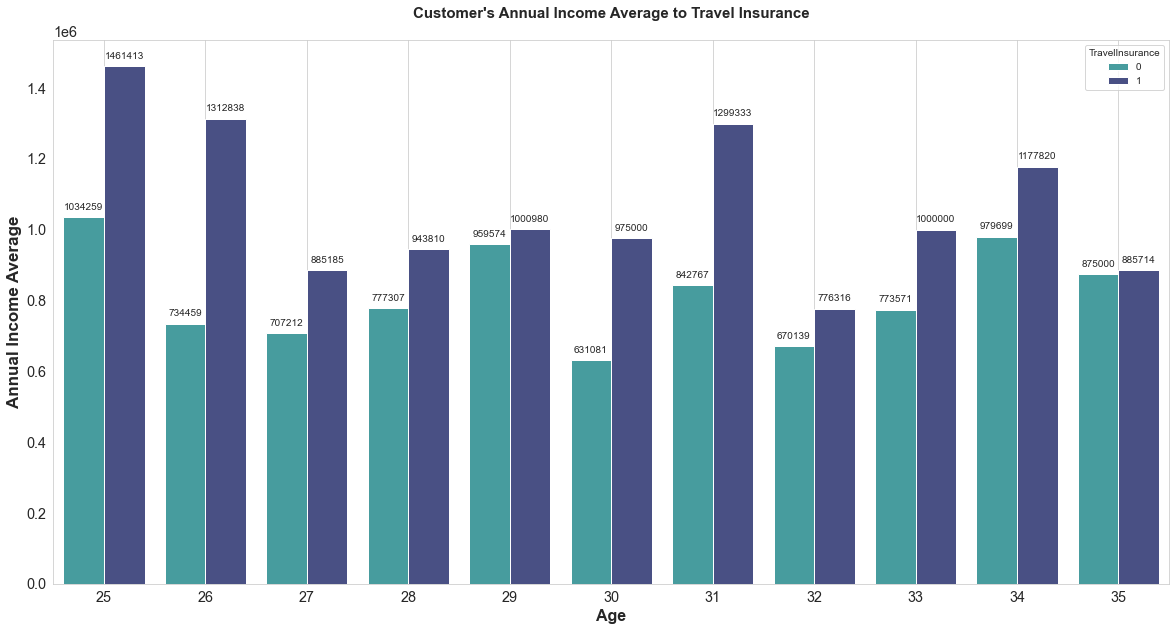

In [47]:
plt.figure(figsize=(20, 10))
Rata = df.groupby(['Age', 'TravelInsurance']).agg({'AnnualIncome':['mean']}).reset_index()
Rata.columns = ['Age', 'TravelInsurance', 'Annual Income Average']
a = sns.barplot(x='Age', y='Annual Income Average', hue='TravelInsurance', data=Rata, palette='mako_r')
#a = sns.barplot(x='Age', y='Annual Income Average', hue='TravelInsurance', data=Rata, color='tosca')

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    size= 10,
    xytext = (0, 10), 
    textcoords = 'offset points')
    
plt.grid()
plt.xlabel('Age', weight='bold',fontsize=16)
plt.ylabel('Annual Income Average', weight='bold', fontsize=17)
plt.title('Customer\'s Annual Income Average to Travel Insurance\n', weight='bold', fontsize=15);

Pada semua umur (25-35 tahun,) nilai Annual Income Average lebih tinggi pada Customer yang membeli produk Travel Insurance.

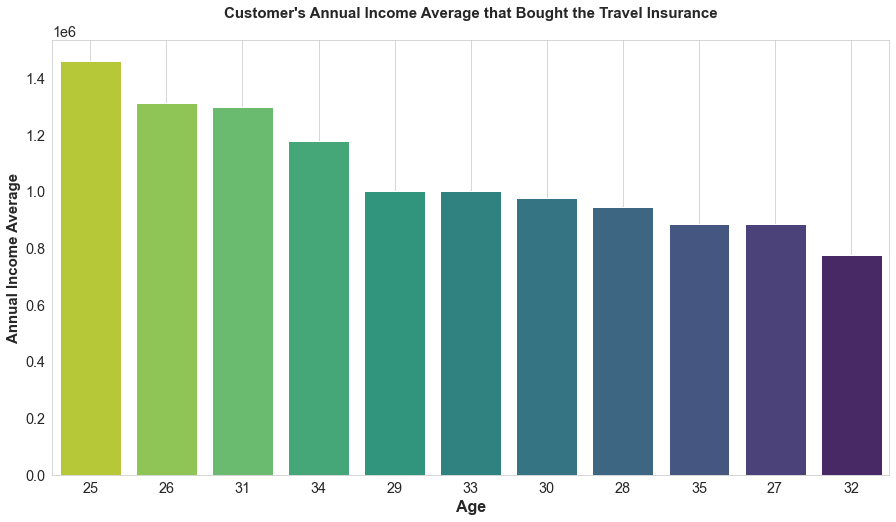

In [48]:
y = Rata[Rata['TravelInsurance']==1]
n = Rata[Rata['TravelInsurance']==0]

plt.figure(figsize=(15,8))
bar = sns.barplot(x="Age", 
            y="Annual Income Average", 
            data=y, 
            order=y.sort_values("Annual Income Average",ascending = False).Age, palette='viridis_r')
plt.grid()
plt.xlabel('Age', weight='bold',fontsize=16)
plt.ylabel('Annual Income Average', weight='bold', fontsize=15)
plt.title('Customer\'s Annual Income Average that Bought the Travel Insurance\n', weight='bold', fontsize=15);

Jika diurutkan berdasarkan data Customer yang hanya membeli produk Travel Insurance, Customer umur 25 tahun memiliki nilai Annual Income Average paling tinggi dengan nilai 1.46 juta. Hal ini relevan dengan insight sebelumnya, bahwa persentase tertinggi Customer yang membeli produk Travel Insurance pada feature Age berada pada umur 25 tahun yang ternyata dipengaruhi oleh Annual Income.

# STAGE 3

## Logistic Regression

In [49]:
df_mod = df_final.copy()

In [50]:
x = df_mod.drop(columns=['TravelInsurance']) #Menggunakan semua feature kecuali Target
y = df_mod['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Melatih Model Pada Data Train 

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

### Prediksi Pada Data Test (Pre-Tunning)

In [52]:
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [53]:
#untuk menghitung AUC 
y_pred_proba = lr.predict_proba(x_test)
y_pred_proba

array([[0.81766008, 0.18233992],
       [0.25571887, 0.74428113],
       [0.20331169, 0.79668831],
       ...,
       [0.81123398, 0.18876602],
       [0.07754259, 0.92245741],
       [0.15537351, 0.84462649]])

### Evaluation (Pre-Tunning)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [55]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Accuracy (Test Set): 0.75
Accuracy (Train Set): 0.78
Precision (Test Set): 0.77
Precision (Train Set): 0.81
Recall (Test Set): 0.47
Recall (Train Set): 0.49


<b>Kesimpulan:</b>
<br>Jika dilihat dari metrcis evaluasi Accuracy, Precision dan Recall sudah terlihat cukup baik dan tidak mengindikasikan overfitting, karena perbeedaan score antara data train dan data set keduanya masih dibawah 0.1. Namun hasil value metrics yang dihasilkan memang belum terbilang tinggi terutama untuk recall sehingga perlu dilakukan regularisasi dan hyperparameter tunning.

In [56]:
print('auc_score pada y_pred: ', roc_auc_score(y_test, y_pred))
print('auc_score pada y_pred_proba: ',roc_auc_score(y_test, y_pred_proba[:, 1]))

auc_score pada y_pred:  0.6951531531531532
auc_score pada y_pred_proba:  0.7417777777777779


<b>Kesimpulan:</b>
<br>Nilai auc_score pada hasil prediksi hasil maupun hasil prediksi nilai probabilitasnya, keduanya menunjukkan hasil kurang dari 0.95, dimana bisa disimpulkan bahwa dataset memiliki tingkat linearitas yang tidak begitu tinggi. Selanjutnya akan dilakukan Regularization & Hyperparameter Tunning untuk mengetahui performa lebih lanjut dari model. Hal ini didukung dengan visualisasi menggunakan pairplot seperti yang sebelumnya sudah tervisualisasi pada stage 2, bahwa tidak terlihat adanya feature yang memiliki linearitas yang tinggi atau tidak terlihat pola terpisah pada warna yang berbeda dari representasi kondisi Target.

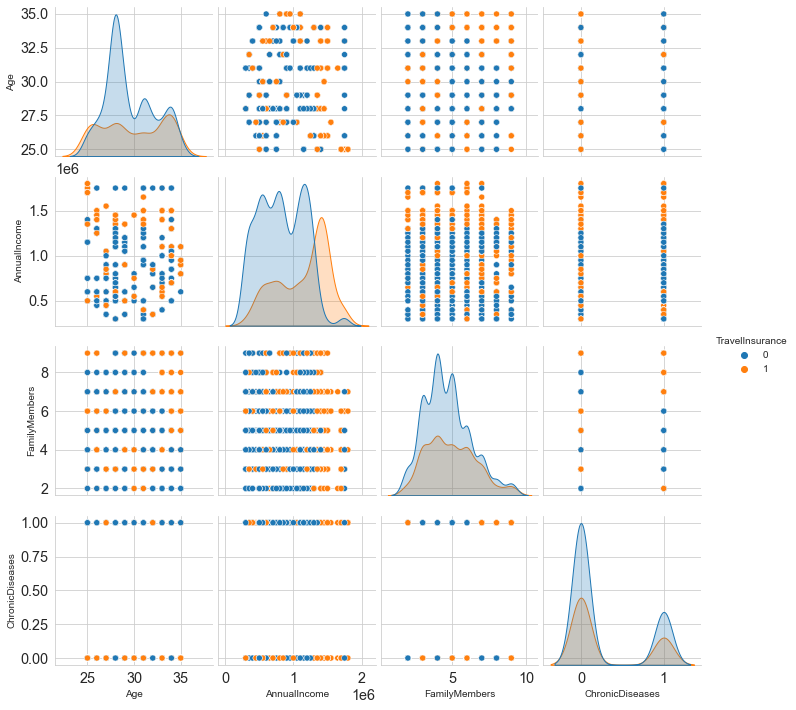

In [57]:
sns.pairplot(dfpairplot, diag_kind='kde', hue='TravelInsurance')
plt.savefig('pairplot.png')

### Regularization & Hyperparameter Tunning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l2']
C = [0.1]
hyperparameters = dict(penalty=penalty, C=C)

#tunning
lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparameters, cv=10, scoring='recall', random_state=42)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1], 'penalty': ['l2']},
                   random_state=42, scoring='recall')

In [59]:
print('Best penalty:', rs.best_estimator_.get_params()['penalty'])
print('Best C:', rs.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.1


<b>Kesimpulan:</b>
<br>Berdasarkan best_estimator didapatkan metode regularization paling baik menggunakan l2 Norm(Ridge Regression), hal ini sesuai dengan banyak feature yang berkaitan dengan target. Kemudian dihasilkan nilai C terbaik adalah 0.1. Selanjutnya akan dilakukan prediksi kembali setelah kondisi tunning.

### Predict (After-Tunning)

In [60]:
y_pred_tun = rs.predict(x_test)
y_pred_tun_train = rs.predict(x_train)
y_pred_tun_proba = rs.predict_proba(x_test)

### Evaluation (After-Tunning)

In [61]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_tun))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_tun_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_tun))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_tun_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_tun))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_tun_train))

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.79
Precision (Test Set): 0.79
Precision (Train Set): 0.83
Recall (Test Set): 0.48
Recall (Train Set): 0.49


In [62]:
print('auc_score pada y_pred_tun: ', roc_auc_score(y_test, y_pred_tun))
print('auc_score pada y_pred_tun_proba: ',roc_auc_score(y_test, y_pred_tun_proba[:, 1]))

auc_score pada y_pred_tun:  0.7023243243243242
auc_score pada y_pred_tun_proba:  0.7369729729729729


<b>Kesimpulan:</b>
<br>Setelah dilakukan Hyperparameter Tunning terlihat adanya peningkatan score pada accuracy dan precision tapi tidak terlalu signifikan. Namun pada metrics evaluasi recall,  terjadi penurunan score sebanyak 0.01 pada score data train maupun data test. Begitu pula dengan auc_score yang dihasilkan, tidak terlihat peningkatan yang signifikan dari nilai sebelumnya dan masih lebih kecil dari nilai 0.95, oleh karena itu dapat disimpulkan pemodelan pada dataset kasus ini memiliki performa yang kurang maksimal jika menerapkan algortima Logistic Regression. 

## K-nearest Neighbor

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

### Split Data Train & Data Test

In [64]:
import pandas as pd
df = pd.read_csv("TravelInsurancePrediction.csv")

# Split Feature and Label
X = df_final.drop(columns=['TravelInsurance'])
y = df['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Fitting Model & Evaluasi

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Prediction & Evaluation
#y_pred = model.predict(X_test)
y_pred = (model.predict_proba(x_test)[:,1] >= 0.2).astype(bool)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.78
Recall (Test Set): 0.51
F1-Score (Test Set): 0.62
AUC: 0.77


In [66]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.8402877697841726
Test score:0.7638190954773869


### Hyperparameter Tuning with RandomSearch

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predict & Evaluation
y_pred_tun = model.predict(X_test)
y_pred_tun_train = model.predict(X_train)
y_pred_tun_proba = model.predict_proba(X_test)

In [68]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_tun))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_tun_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_tun))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_tun_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_tun))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_tun_train))

Accuracy (Test Set): 0.78
Accuracy (Train Set): 0.79
Precision (Test Set): 0.91
Precision (Train Set): 0.88
Recall (Test Set): 0.45
Recall (Train Set): 0.48


### Best Estimators

In [69]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 26
Best p: 2
Best algorithm: brute


### Score Akhir

In [70]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.8787878787878788
Test score:0.9099099099099099


<b>Kesimpulan:</b> 
<br>Metrics evaluation score yang dihasilkan pada algoritma KNN terlihat adanya indikasi underfitting dengan score pada Test dataset lebih besar dari score pada Train dataset. Selanjutnya akan dilakukan uji coba menggunakan algoritma Decision Tree.

## Model: RandomForest Classifier 

### Split Data Train & Test

In [71]:
x = df_mod.drop(columns=['TravelInsurance']) #Menggunakan semua feature kecuali Target
y = df_mod['TravelInsurance'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Melatih Model Pada Data Train 

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluation (Pre-Tunning)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))

Accuracy (Test Set): 0.79
Accuracy (Train Set): 0.93
Precision (Test Set): 0.76
Precision (Train Set): 0.93
Recall (Test Set): 0.64
Recall (Train Set): 0.86


In [74]:
print('auc_score pada y_pred-test: ', roc_auc_score(y_test, y_pred))
print('auc_score pada y_pred_proba-test: ',roc_auc_score(y_test, y_pred_proba[:, 1]))

auc_score pada y_pred-test:  0.7575675675675675
auc_score pada y_pred_proba-test:  0.7781861861861861


In [75]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_train, y_pred_proba_train[:, 1]))

0.9136981571007962
0.9836940223910435


In [76]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Regularization & Hyperparameter Tunning

In [77]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 45, num = 5)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(1, 45, num = 5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(x_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(x_test)
y_pred_proba = rf_tuned.predict_proba(x_test)
y_pred_train = rf_tuned.predict(x_train)
y_pred_proba_train = rf_tuned.predict_proba(x_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
print("auc_score pada y_pred: %.2f" %  roc_auc_score(y_test, y_pred))
print("auc_score pada y_pred_proba: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train: %.2f" % roc_auc_score(y_train, y_pred_train))
print("auc_score pada y_pred_proba_train: %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.85
Precision (Test Set): 0.94
Precision (Train Set): 0.93
Recall (Test Set): 0.59
Recall (Train Set): 0.62
auc_score pada y_pred: 0.78
auc_score pada y_pred_proba: 0.80
auc_score pada y_pred_train: 0.80
auc_score pada y_pred_proba_train: 0.94


In [78]:
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [79]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 45
Best bootstrap: True
Best criterion: gini
Best max_depth: 34
Best min_samples_split: 7
Best min_samples_leaf: 3
Best max_features: sqrt
Best n_jobs: -1


Text(0.5, 1.0, 'feature importance score')

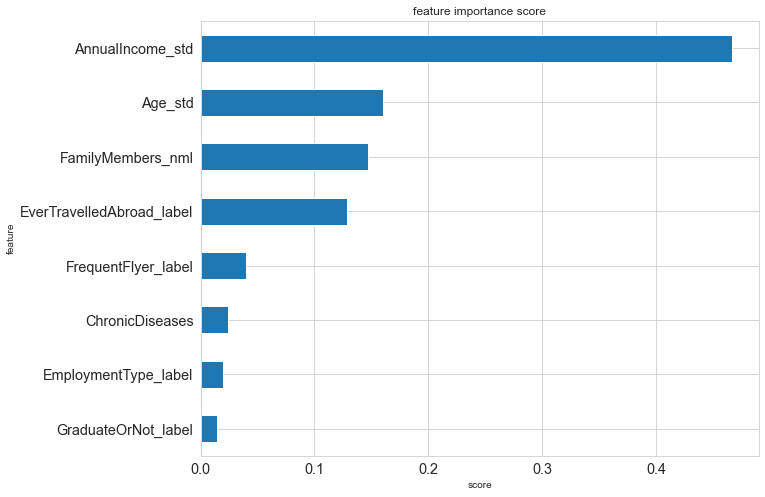

In [80]:
# plt.figsize(10, 8)
feat_importances = pd.Series(rf_tuned.best_estimator_.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Drop Feature (Based on Feature Importance)

In [81]:
x2 = df_final.drop(['GraduateOrNot_label','ChronicDiseases','EmploymentType_label','FrequentFlyer_label','TravelInsurance'], axis=1)
y2 = df_final['TravelInsurance']

In [82]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state=42)

In [83]:
from sklearn.tree import DecisionTreeClassifier
model2 = RandomForestClassifier()
model2.fit(x2_train, y2_train)

RandomForestClassifier()

In [84]:
y_pred = model2.predict(x2_test)
y_pred_proba = model2.predict_proba(x2_test)
y_pred_train = model2.predict(x2_train)
y_pred_proba_train = model2.predict_proba(x2_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y2_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
print('auc_score pada y_pred: ', roc_auc_score(y2_test, y_pred))
print('auc_score pada y_pred_proba: ',roc_auc_score(y2_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train: %.2f" % roc_auc_score(y2_train, y_pred_train))
print("auc_score pada y_pred_proba_train: %.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.89
Precision (Test Set): 0.78
Precision (Train Set): 0.91
Recall (Test Set): 0.64
Recall (Train Set): 0.75
auc_score pada y_pred:  0.76781981981982
auc_score pada y_pred_proba:  0.7982162162162162
auc_score pada y_pred_train: 0.85
auc_score pada y_pred_proba_train: 0.96


In [85]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 5, stop = 60, num =5)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(5, 60, num =5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt','log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned_2 = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned_2.fit(x2_train,y2_train)

# Predict & Evaluation
y_pred = rf_tuned_2.predict(x2_test)
y_pred_proba = rf_tuned_2.predict_proba(x2_test)
y_pred_train = rf_tuned_2.predict(x2_train)
y_pred_proba_train = rf_tuned_2.predict_proba(x2_train)

print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y2_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
print("auc_score pada y_pred: %.2f" % roc_auc_score(y2_test, y_pred))
print("auc_score pada y_pred_proba: %.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train: %.2f" % roc_auc_score(y_train, y_pred_train))
print("auc_score pada y_pred_proba_train: %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.84
Precision (Test Set): 0.96
Precision (Train Set): 0.91
Recall (Test Set): 0.59
Recall (Train Set): 0.60
auc_score pada y_pred: 0.78
auc_score pada y_pred_proba: 0.81
auc_score pada y_pred_train: 0.78
auc_score pada y_pred_proba_train: 0.86


## Model: Decision Tree (Experiment I-Tanpa Menghilangkan Feature)

### Split Data Train & Data Test

In [86]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("max_column",100)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [88]:
X = df_final.drop(columns=['TravelInsurance'])
y = df_final['TravelInsurance']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Fitting Model & Evaluasi

In [89]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.73
Recall (Test Set): 0.60
F1-Score (Test Set): 0.66
AUC: 0.72


In [90]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.9294964028776979
Test score:0.7705192629815746


<b>Kesimpulan:</b> 
<br>Terlihat adanya indikasi overfitting pada ditinjau dari metric accuracy dengan perbedaan score sebanyak 0.15 antara datatrain dengan datatestnya, selanjutnya akan dilakukan Hyperparameter Tuning menggunakan metode RandomSearch. 

### Hyperparameter Tuning with RandomSearch

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_proba = model.predict_proba(X_test)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
print('auc_score pada y_pred: ', roc_auc_score(y_test, y_pred))
print('auc_score pada y_pred_proba: ',roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.80
Precision (Test Set): 0.79
Precision (Train Set): 0.84
Recall (Test Set): 0.50
Recall (Train Set): 0.53
auc_score pada y_pred:  0.7100000000000001
auc_score pada y_pred_proba:  0.7541921921921922


In [92]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.8354838709677419
Test score:0.7872340425531915


<b>Kesimpulan:</b> 
<br>● Setelah dilakukan hyperparameter tuning dan iterasi modelling, didapatkan nilai akhir score Accuracy, Precision & AUC nya  cukup baik serta tidak terlihat adanya indikasi overfitting pada semua metrics evaluation score. Namun untuk score recall yang dihasilkan masih terbilang cukup rendah. Selanjutnya akan dilakukan experiment Decision Tree ke-2 disertai dengan experiment pengurangan Feature.

## Model: Decision Tree (Experiment II - Menghilangkan Feature)

### Model: Decision Tree

In [93]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ChronicDiseases            1987 non-null   int64  
 1   TravelInsurance            1987 non-null   int64  
 2   EmploymentType_label       1987 non-null   int8   
 3   GraduateOrNot_label        1987 non-null   int8   
 4   FrequentFlyer_label        1987 non-null   int8   
 5   EverTravelledAbroad_label  1987 non-null   int8   
 6   AnnualIncome_std           1987 non-null   float64
 7   FamilyMembers_nml          1987 non-null   float64
 8   Age_std                    1987 non-null   float64
dtypes: float64(3), int64(2), int8(4)
memory usage: 85.5 KB


In [94]:
x = df_final.drop(columns=['TravelInsurance']) #Menggunakan semua feature kecuali Target
y = df_final['TravelInsurance'] # target / label

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

### Decision Tree dengan Hyperparameter Default

In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
model.feature_importances_

array([0.05965056, 0.02410298, 0.01555626, 0.0289296 , 0.00837021,
       0.52395768, 0.2365514 , 0.10288131])

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
print("auc_score pada y_pred: %.2f" % roc_auc_score(y_test, y_pred))
print("auc_score pada y_pred_proba: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train: %.2f" % roc_auc_score(y_train, y_pred_train))
print("auc_score pada y_pred_proba_train: %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.93
Precision (Test Set): 0.73
Precision (Train Set): 0.98
Recall (Test Set): 0.60
Recall (Train Set): 0.82
auc_score pada y_pred: 0.73
auc_score pada y_pred_proba: 0.72
auc_score pada y_pred_train: 0.90
auc_score pada y_pred_proba_train: 0.99


In [99]:
print('Test score:' + str(model.score(x_test, y_test))) #Accuracy
print('Train score: ' + str(model.score(x_train, y_train))) #Accuracy

Test score:0.7688442211055276
Train score: 0.9294964028776979


<b>Kesimpulan:</b>
<br>Nilai score yang dihasilkan memperlihatkan adanya indikasi overfitting, karena terdapat perbedaan score > 0.1 disemua metric evaluasi baik dari Accuracy, Precision, Recall maupun AUC. Selanjutnya akan dilakukan Hyperparameter Tunning.

### Decision Tree dengan Tuning Hyperparameter

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 5)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 70, 100] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
#min_impurity_decrease = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(x_train, y_train)

# Predict & Evaluation
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
print("auc_score pada y_pred: %.2f" % roc_auc_score(y_test, y_pred))
print("auc_score pada y_pred_proba: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train:%.2f" % roc_auc_score(y2_train, y_pred_train))
print("auc_score pada y_pred_proba_train:%.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.82
Precision (Test Set): 0.81
Precision (Train Set): 0.84
Recall (Test Set): 0.61
Recall (Train Set): 0.62
auc_score pada y_pred: 0.76
auc_score pada y_pred_proba: 0.79
auc_score pada y_pred_train:0.78
auc_score pada y_pred_proba_train:0.87


In [101]:
print('Test score:' + str(model.score(x_test, y_test))) #precision
print('Train score: ' + str(model.score(x_train, y_train))) #precision

Test score:0.8083832335329342
Train score: 0.8384401114206128


In [102]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best max_features:', model.best_estimator_.get_params()['min_impurity_decrease'])

Best max_depth: 28
Best min_samples_split: 40
Best min_samples_leaf: 4
Best max_features: sqrt
Best max_features: 0.0


<b>Kesimpulan:</b> 
<br>Setelah dilakukan hyperparameter tuning, terlihat score Accuracy, Precision, Recall dan AUC nya sudah cukup baik dan tidak terlihat adanya indikasi overfitting, karena perbedaan score antara data train dan data testnya < 0.1, namun untuk lebih mengoptimalkan nilai score yang dihasilkan selanjutnya akan dilakukan pengecekan feature importance serta pengurangan feature dengan iterasi modeling untuk tahap selanjutnya.

### Pengurangan Feature + Hyperparamater Default

Text(0.5, 1.0, 'feature importance score')

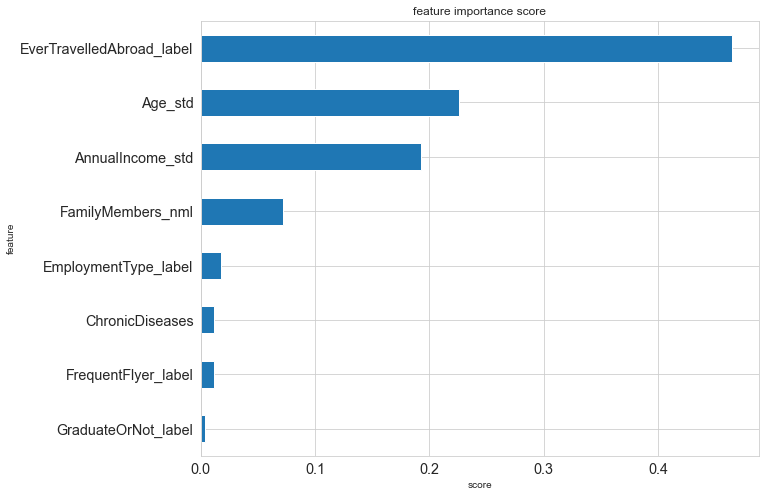

In [103]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Karena overfit dan sudah dilakukan hyperparameter tuning hasil recall menurun, maka dicoba dilakukan pengurangan fitur

In [104]:
x2 = df_final.drop(['GraduateOrNot_label','FrequentFlyer_label','ChronicDiseases','EmploymentType_label','TravelInsurance'], axis=1)
y2 = df_final['TravelInsurance']

In [105]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state=42)

In [106]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x2_train, y2_train)

DecisionTreeClassifier()

In [107]:
y_pred = model2.predict(x2_test)
y_pred_proba = model2.predict_proba(x2_test)
y_pred_train = model2.predict(x2_train)
y_pred_train_proba = model2.predict_proba(x2_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y2_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
print("auc_score pada y_pred:%.2f" % roc_auc_score(y2_test, y_pred))
print("auc_score pada y_pred_proba:%.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train:%.2f" % roc_auc_score(y2_train, y_pred_train))
print("auc_score pada y_pred_proba_train:%.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.89
Precision (Test Set): 0.79
Precision (Train Set): 0.94
Recall (Test Set): 0.62
Recall (Train Set): 0.72
auc_score pada y_pred:0.76
auc_score pada y_pred_proba:0.77
auc_score pada y_pred_train:0.85
auc_score pada y_pred_proba_train:0.87


In [108]:
print('Test score:' + str(model2.score(x2_test, y2_test))) #Accuracy
print('Train score: ' + str(model2.score(x2_train, y2_train))) #Accuracy

Test score:0.7989949748743719
Train score: 0.8856115107913669


<b>Kesimpulan:</b> 
<br>Setelah dilakukan pengurangan feature dan iterasi modelling dengan hyperparameter default, terlihat score Accuracy, Precision, Recall dan AUC nya sudah cukup baik, namun masih terlihat adanya indikasi overfitting pada socre precision dengan perbedaan score antara data train dan data testnya sebanyak 0.14, selanjutnya akan dilakukan Hyperparameter Tuning kembali untuk mengoptimalkan score precision dilanjutkan dengan iterasi modeling.

### Pengurangan fitur + tuning hyperparameter (Model Akhir)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [int(x) for x in np.linspace(1, 50, num = 5)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 20, 30] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
#min_impurity_decrease = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model2 = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model2.fit(x2_train, y2_train)

# Predict & Evaluation
y_pred = model2.predict(x2_test)
y_pred_proba = model2.predict_proba(x2_test)
y_pred_train = model2.predict(x2_train)
y_pred_train_proba = model2.predict_proba(x2_train)
print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred))
print("Precision (Train Set): %.2f" % precision_score(y2_train, y_pred_train))
print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
print("auc_score pada y_pred:%.2f" % roc_auc_score(y2_test, y_pred))
print("auc_score pada y_pred_proba:%.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
print("auc_score pada y_pred_train:%.2f" % roc_auc_score(y2_train, y_pred_train))
print("auc_score pada y_pred_proba_train:%.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.83
Precision (Test Set): 0.88
Precision (Train Set): 0.90
Recall (Test Set): 0.59
Recall (Train Set): 0.60
auc_score pada y_pred:0.77
auc_score pada y_pred_proba:0.80
auc_score pada y_pred_train:0.78
auc_score pada y_pred_proba_train:0.87


In [110]:
print('Test score:' + str(model2.score(x2_test, y2_test))) #precision
print('Train score: ' + str(model2.score(x2_train, y2_train))) #precision

Test score:0.8783783783783784
Train score: 0.8953846153846153


<b>Kesimpulan</b> :
<br>● Setelah dilakukan pengurangan feature, hyperparameter tuning dan iterasi modelling, didapatkan nilai akhir score Accuracy, Precision, Recall dan AUC nya  cukup baik, dan tidak terlihat adanya indikasi overfitting pada semua metrics evaluation score. Namun pada case ini kami mengutamakan score AUC sebagai evaluasi metric yang pertama dikarenakan sifatnya yang lebih stabil, dan Precision sebagai score metric evaluation yang kedua dengan alasan fokus permasalahan pada dataset ini adalah untuk memaksimalkan serta mengefisiensikan cost marketing dalam melakukan pemasaran penentuan target potential Customer dalam membeli asuransi. Diharapkan nantinya tim marketing akan tepat sasaran dalam menghubungin calon potential Customer.
<br>● Berdasarkan eksperimen yang telah dilakukan dari keempat algor (Logistic Regression, K-nearest Neighbor, RandomForest Classifier & Decision Tree), didapatkan score metrics evaluation terbaik pada model dengan algoritma Decision Tree yang disertai dengan pengurangan feature berlandaskan hasil pengecekan menggunakan best estimator & feature importance, dengan score Precision (Test Set)->0.88 dan (Train Set)->0.90 serta AUC(pred)->0.76 dan AUC(pred_proba)->0.80. Hal ini didukung dengan banyaknya feature-feature bertipe categorical sehingga mendapat hasil terbaik & optimal saat menggunakan algoritma Decision Tree.

# Prediksi Menggunakan Data Asli

In [111]:
#Dataset setelah drop feature
print(x2.shape)

(1987, 4)


In [112]:
#Mencari y_pred menggunakan dataset setelah drop feature
y_pred = model2.predict(x2)
y_pred_proba = model2.predict_proba(x2)

In [113]:
#Target/Label pada data asli
y_true = np.array(df_final['TravelInsurance'])

In [114]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true,y_pred)
cf

array([[1225,   52],
       [ 289,  421]], dtype=int64)

In [115]:
print("Accuracy (Origin Data): %.2f" % precision_score(y_true, y_pred))
print("Precision (Origin Data): %.2f" % precision_score(y_true, y_pred))
print("Recall (Origin Data): %.2f" % recall_score(y_true, y_pred))
print("AUC (Origin Data): %.2f" % roc_auc_score(y_true, y_pred))
print("AUC-Proba (Origin Data): %.2f" % roc_auc_score(y_true, y_pred_proba[:, 1]))

Accuracy (Origin Data): 0.89
Precision (Origin Data): 0.89
Recall (Origin Data): 0.59
AUC (Origin Data): 0.78
AUC-Proba (Origin Data): 0.86


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1277
           1       0.89      0.59      0.71       710

    accuracy                           0.83      1987
   macro avg       0.85      0.78      0.79      1987
weighted avg       0.84      0.83      0.82      1987

